<a href="https://colab.research.google.com/github/harshavardhangadila/Hopping-Window-Crude-Oil-Prices/blob/main/Week3_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from tabulate import tabulate

In [23]:
df = pd.read_excel('/content/Bank_Dataset.xlsx')

In [31]:
if 'Loan ID' in df.columns and 'Customer ID' in df.columns:
    df = df.drop(columns=['Loan ID', 'Customer ID'])

In [32]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes


In [33]:
if df['Loan Status'].dtype == 'object':
    df['Loan Status'] = df['Loan Status'].astype('category').cat.codes

In [34]:
X = df.drop(columns=['Loan Status'])  # Features
y = df['Loan Status']  # Target variable

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [37]:
# Müller Loop:
results = []
param_grid = [
    {'learning_rate': 0.01, 'n_estimators': 100, 'max_depth': 3},
    {'learning_rate': 0.1, 'n_estimators': 200, 'max_depth': 5},
    {'learning_rate': 0.2, 'n_estimators': 300, 'max_depth': 7}
]

In [38]:
learning_rates = []
accuracies = []

for params in param_grid:
    model.set_params(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cv_score = np.mean(cross_val_score(model, X, y, cv=5))

    results.append([params['learning_rate'], params['n_estimators'], params['max_depth'], acc, cv_score])

    # Store values for trend plot
    learning_rates.append(params['learning_rate'])
    accuracies.append(acc)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:45:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:45:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:45:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:45:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:45:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

In [39]:
results_df = pd.DataFrame(results, columns=['Learning Rate', 'Estimators', 'Max Depth', 'Accuracy', 'CV Score'])

In [40]:
print(tabulate(results_df, headers='keys', tablefmt='grid'))

+----+-----------------+--------------+-------------+------------+------------+
|    |   Learning Rate |   Estimators |   Max Depth |   Accuracy |   CV Score |
+====+=================+==============+=============+============+============+
|  0 |            0.01 |          100 |           3 |   0.844887 |   0.848863 |
+----+-----------------+--------------+-------------+------------+------------+
|  1 |            0.1  |          200 |           5 |   0.844887 |   0.84944  |
+----+-----------------+--------------+-------------+------------+------------+
|  2 |            0.2  |          300 |           7 |   0.837749 |   0.844333 |
+----+-----------------+--------------+-------------+------------+------------+


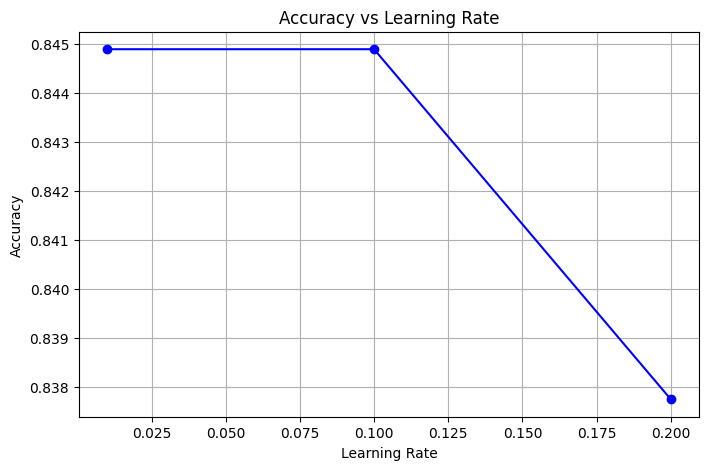

In [41]:
# Plot Accuracy vs Learning Rate
plt.figure(figsize=(8,5))
plt.plot(learning_rates, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Learning Rate")
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

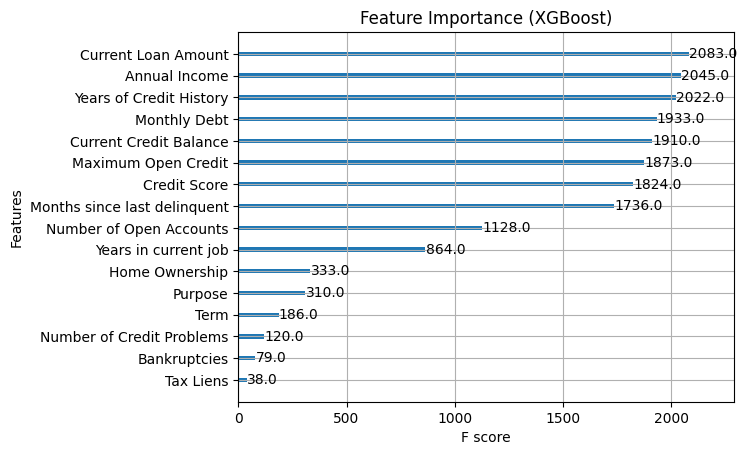

In [42]:
# Feature Importance Plot
plt.figure(figsize=(10,6))
xgb.plot_importance(model, importance_type='weight')
plt.title("Feature Importance (XGBoost)")
plt.show()

In [43]:
# Confusion Matrix Plot
y_pred_final = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_final)


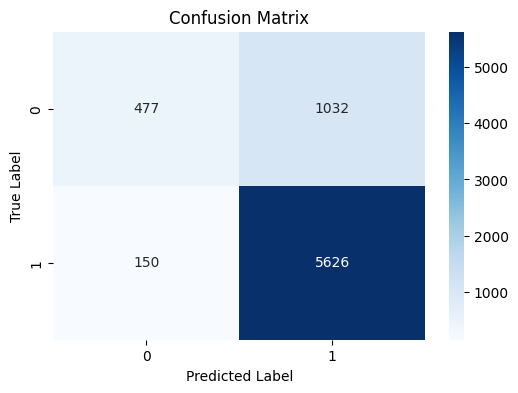

In [44]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [45]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_final))

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.32      0.45      1509
           1       0.84      0.97      0.90      5776

    accuracy                           0.84      7285
   macro avg       0.80      0.65      0.68      7285
weighted avg       0.83      0.84      0.81      7285

